_Lambda School Data Science_
# Choose appropriate visualizations

# Upgrade Seaborn

Make sure you have at least version 0.9.0

In [1]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /home/schmatthew/anaconda3/lib/python3.7/site-packages (0.9.0)
Requirement not upgraded as not directly required: numpy>=1.9.3 in /home/schmatthew/anaconda3/lib/python3.7/site-packages (from seaborn) (1.15.1)
Requirement not upgraded as not directly required: pandas>=0.15.2 in /home/schmatthew/anaconda3/lib/python3.7/site-packages (from seaborn) (0.23.4)
Requirement not upgraded as not directly required: scipy>=0.14.0 in /home/schmatthew/anaconda3/lib/python3.7/site-packages (from seaborn) (1.1.0)
Requirement not upgraded as not directly required: matplotlib>=1.4.3 in /home/schmatthew/anaconda3/lib/python3.7/site-packages (from seaborn) (2.2.3)
Requirement not upgraded as not directly required: python-dateutil>=2.5.0 in /home/schmatthew/anaconda3/lib/python3.7/site-packages (from pandas>=0.15.2->seaborn) (2.7.3)
Requirement not upgraded as not directly required: pytz>=2011k in /home/schmatthew/anaconda3/lib/python3.7/site-packages (from pandas

In [2]:
import seaborn as sns
sns.__version__

'0.9.0'

# Fix misleading visualizations

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Sprint-02-Storytelling-With-Data/master/module2-choose-appropriate-visualizations/misleading.py
    
import misleading

--2018-11-13 15:06:30--  https://raw.githubusercontent.com/LambdaSchool/DS-Sprint-02-Storytelling-With-Data/master/module2-choose-appropriate-visualizations/misleading.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1641 (1.6K) [text/plain]
Saving to: ‘misleading.py.2’

misleading.py.2     100%[===================>]   1.60K  --.-KB/s    in 0s      

2018-11-13 15:06:30 (116 MB/s) - ‘misleading.py.2’ saved [1641/1641]



#### Fix misleading plot #1

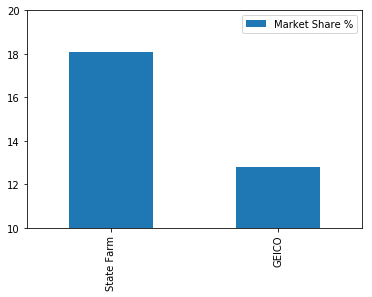

In [5]:
misleading.plot1()

#### Fix misleading plot #2

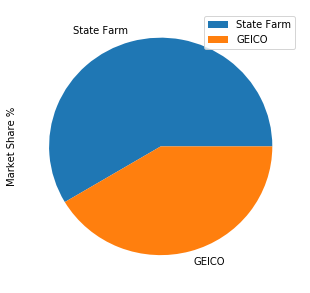

In [6]:
misleading.plot2()

#### Fix misleading plot #3

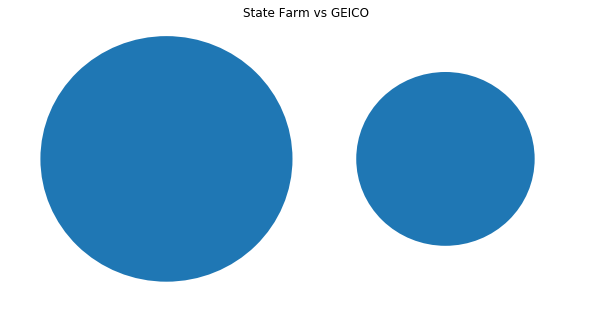

In [7]:
misleading.plot3()

#### Fix misleading plot #4

_If you're on Jupyter (not Colab) then uncomment and run this cell below:_

In [8]:
import altair as alt
alt.renderers.enable('notebook')

ModuleNotFoundError: No module named 'altair'

In [ ]:
misleading.plot4()

#### Links
- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [Where to Start and End Your Y-Axis Scale](http://stephanieevergreen.com/y-axis/)
- [xkcd heatmap](https://xkcd.com/1138/)
- [Surprise Maps: Showing the Unexpected](https://medium.com/@uwdata/surprise-maps-showing-the-unexpected-e92b67398865)

# Use Seaborn to visualize distributions and relationships with continuous and discrete variables

#### Links
- [Seaborn tutorial](https://seaborn.pydata.org/tutorial.html)
- [Seaborn example gallery](https://seaborn.pydata.org/examples/index.html)
- [Chart Chooser](https://extremepresentation.typepad.com/files/choosing-a-good-chart-09.pdf)

## 1. Anscombe dataset

### Load dataset

In [ ]:
df = sns.load_dataset('anscombe')

### See the data's shape

In [ ]:
df.shape

### See the data

In [ ]:
df.head()

### [Group by](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) `'dataset'`

In [ ]:
groups = df.groupby(['dataset'])

### [Describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) the groups

In [ ]:
groups.describe()

### Get the [count](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html), for each column in each group

In [ ]:
groups.count()

### Get the [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html) ...

In [ ]:
groups.mean()

### Get the [standard deviation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html) ...

In [ ]:
groups.std()

### Get the [correlation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) ...

In [ ]:
groups.corr()

### Use pandas to [plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) the groups, as scatter plots

In [ ]:
groups.plot(x = 'x', y = 'y', kind='scatter');

### Use Seaborn to make [relational plots](http://seaborn.pydata.org/generated/seaborn.relplot.html)

In [ ]:
import seaborn as sns

sns.relplot('x', 'y', col='dataset', data=df);

### Use Seaborn to make [linear model plots](http://seaborn.pydata.org/generated/seaborn.lmplot.html)

In [ ]:
sns.lmplot('x', 'y', col='dataset', hue='dataset', ci=None, col_wrap=2, data=df);

#### Links
- [Seaborn examples: Anscombe's quartet](http://seaborn.pydata.org/examples/anscombes_quartet.html)
- [Wikipedia: Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)
- [The Datasaurus Dozen](https://www.autodeskresearch.com/publications/samestats)

## 2. Tips dataset

### Load dataset

In [9]:
import numpy as np
tips = sns.load_dataset('tips')

### See the data's shape

In [10]:
tips.shape

(244, 7)

### See the first 5 rows

In [11]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Describe the data

In [12]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [13]:
tips.describe(exclude = [np.number])

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


### Make univariate [distribution plots](https://seaborn.pydata.org/generated/seaborn.distplot.html)

/home/schmatthew/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


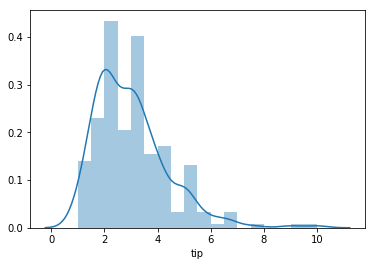

In [14]:
sns.distplot(tips.tip);

/home/schmatthew/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


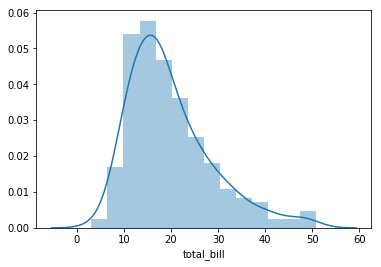

In [15]:
sns.distplot(tips.total_bill);

In [16]:
tips['percent'] = tips.tip / tips.total_bill

/home/schmatthew/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


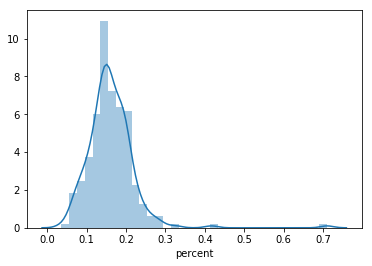

In [17]:
sns.distplot(tips.percent);

### Make bivariate [relational plots](https://seaborn.pydata.org/generated/seaborn.relplot.html)

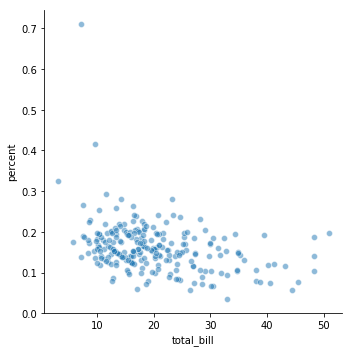

In [18]:
sns.relplot('total_bill', 'percent',  data=tips, alpha=0.5);

### Make univariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

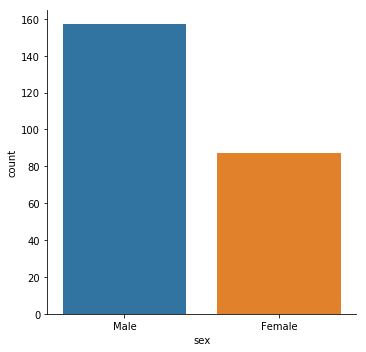

In [19]:
sns.catplot('sex', data=tips, kind='count');

### Make bivariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

/home/schmatthew/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


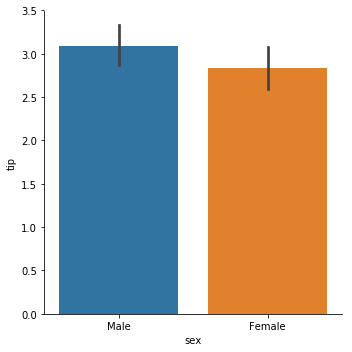

In [20]:
sns.catplot('sex', 'tip', data=tips, kind='bar');

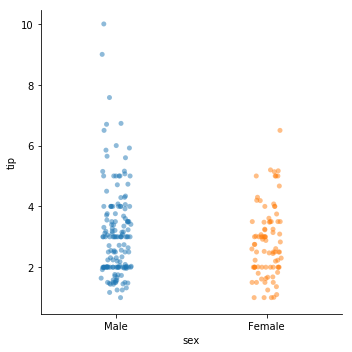

In [21]:
sns.catplot('sex', 'tip', data=tips, kind='strip', alpha=0.5);

/home/schmatthew/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


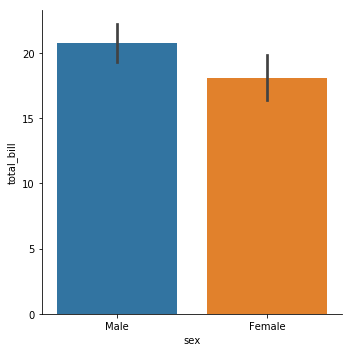

In [22]:
sns.catplot('sex', 'total_bill', data=tips, kind='bar');

## 3. Flights

### Load dataset

In [23]:
flights = sns.load_dataset('flights')

### See the data's shape

In [24]:
flights.shape

(144, 3)

### See the first 5 rows

In [25]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


### Describe the data

In [26]:
flights.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


In [29]:
flights['month'].describe()

count          144
unique          12
top       December
freq            12
Name: month, dtype: object

In [32]:
mgroup = flights.groupby(['month'])
mgroup.describe()

passengers                                                        \
               count        mean         std    min     25%    50%     75%   
month                                                                        
January         12.0  241.750000  101.032960  112.0  164.50  223.0  321.25   
February        12.0  235.000000   89.619397  118.0  172.50  214.5  305.25   
March           12.0  270.166667  100.559194  132.0  189.25  251.5  357.50   
April           12.0  267.083333  107.374839  129.0  176.50  252.0  348.00   
May             12.0  271.833333  114.739890  121.0  180.25  252.0  357.00   
June            12.0  311.666667  134.219856  135.0  208.00  289.5  425.25   
July            12.0  351.333333  156.827255  148.0  222.25  333.0  471.50   
August          12.0  351.083333  155.783333  148.0  231.25  320.0  476.50   
September       12.0  302.416667  123.954140  136.0  202.75  285.5  404.00   
October         12.0  266.583333  110.744964  119.0  183.75  251.5  350.00   
November        12.0  232.833333   95.185783  104.0  165.50  220.0  306.25   
December        12.0  261.833333  103.093808  118.0  187.00  253.5  336.25   

                  year                                                      \
             max count    mean       std     min      25%     50%      75%   
month                                                                        
January    417.0  12.0  1954.5  3.605551  1949.0  1951.75  1954.5  1957.25   
February   391.0  12.0  1954.5  3.605551  1949.0  1951.75  1954.5  1957.25   
March      419.0  12.0  1954.5  3.605551  1949.0  1951.75  1954.5  1957.25   
April      461.0  12.0  1954.5  3.605551  1949.0  1951.75  1954.5  1957.25   
May        472.0  12.0  1954.5  3.605551  1949.0  1951.75  1954.5  1957.25   
June       535.0  12.0  1954.5  3.605551  1949.0  1951.75  1954.5  1957.25   
July       622.0  12.0  1954.5  3.605551  1949.0  1951.75  1954.5  1957.25   
August     606.0  12.0  1954.5  3.605551  1949.0  1951.75  1954.5  1957.25   
September  508.0  12.0  1954.5  3.605551  1949.0  1951.75  1954.5  1957.25   
October    461.0  12.0  1954.5  3.605551  1949.0  1951.75  1954.5  1957.25   
November   390.0  12.0  1954.5  3.605551  1949.0  1951.75  1954.5  1957.25   
December   432.0  12.0  1954.5  3.605551  1949.0  1951.75  1954.5  1957.25   

                   
              max  
month              
January    1960.0  
February   1960.0  
March      1960.0  
April      1960.0  
May        1960.0  
June       1960.0  
July       1960.0  
August     1960.0  
September  1960.0  
October    1960.0  
November   1960.0  
December   1960.0

### Plot year & passengers

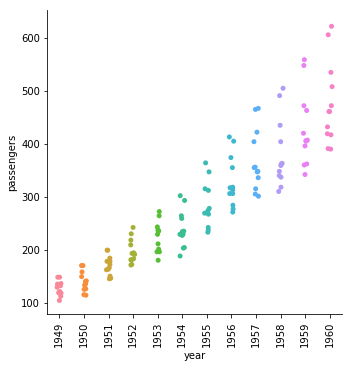

In [70]:
sns.catplot('year', 'passengers', data=flights);
plt.xticks(rotation=90);

### Plot month & passengers

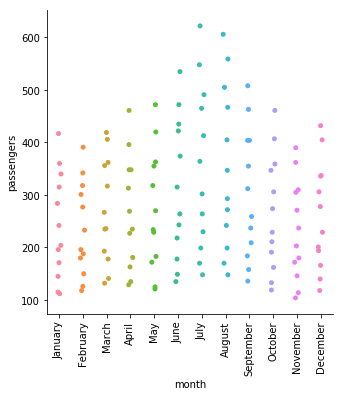

In [69]:
sns.catplot('month', 'passengers', data=flights);
plt.xticks(rotation=90);

In [59]:
total_pass = mgroup.passengers.sum()
type(total_pass) #sum creates a series, not a df ---> see below

pandas.core.series.Series

In [82]:
total_pass = pd.DataFrame(mgroup.passengers.sum(), columns = ['passengers'])
total_pass

,passengers
month,
January,2901
February,2820
March,3242
April,3205
May,3262
June,3740
July,4216
August,4213
September,3629


In [83]:
type(total_pass)

pandas.core.frame.DataFrame

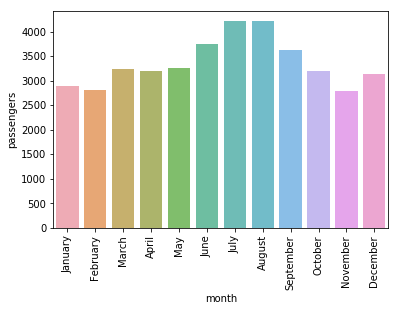

In [84]:
# sns.catplot('month', 'passengers', data=total_pass, kind='bar')
sns.barplot(total_pass.index, total_pass.passengers, alpha=0.8);
plt.xticks(rotation=90);

### Create a [pivot table](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html) of passengers by month and year

In [86]:
ptable = flights.pivot_table('passengers', 'month', 'year')
ptable

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


### Plot the pivot table as a [heat map](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

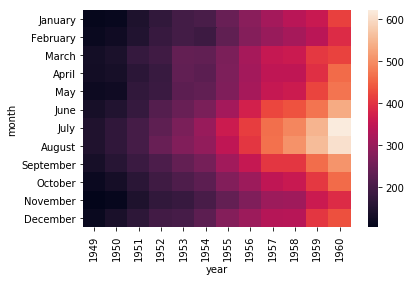

In [88]:
sns.heatmap(ptable);